<a href="https://colab.research.google.com/github/Ivy1093367/Boyandgirl_predict/blob/main/v1.1_0330_An.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 環境設定&資料集匯入**

In [755]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [756]:
import pandas as pd
corpus_root = 'drive/My Drive/Colab Notebooks/datasets/'

In [757]:
train_df = pd.read_csv(corpus_root+'boygirltrain.csv')
test_df = pd.read_csv(corpus_root+'boygirltest.csv')

In [758]:
train_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,2,處女座,Apple,154.0,43.0,NaN,NaN,583.0,0,Beautiful
1,2,2,處女座,Apple,156.0,47.0,NaN,130.0,NaN,3.5,Enjoying being who I'm notsss
2,3,1,射手座,NaN,170.0,61.0,NaN,90.0,540.0,NaN,Practice Makes perfect
3,4,1,射手座,Apple,170.0,62.0,4.0,100.0,NaN,5,Straightforward
4,5,2,射手座,Android,158.0,67.0,NaN,128.0,320.0,1.2,Humorous
...,...,...,...,...,...,...,...,...,...,...,...
418,419,1,處女座,Android,166.0,66.0,4.0,90.0,1000.0,1,I hope i am a super hero.
419,420,1,牡羊座,Android,176.0,65.0,4.0,87.0,1300.0,2,NaN
420,421,1,NaN,Apple,174.0,72.0,2.0,NaN,2000.0,9,NaN
421,422,2,天蠍座,NaN,167.0,50.0,3.0,180.0,483.0,10,NaN


In [759]:
test_df

,id,gender,star_sign,phone_os,height,weight,sleepiness,iq,fb_friends,yt,self_intro
0,1,0,天蠍座,Apple,200.0,100.0,1.0,87.0,87.0,87.0,GOod
1,2,0,金牛座,Apple,175.0,80.0,3.0,NaN,2000.0,NaN,Easygoing
2,3,0,雙子座,Apple,155.0,45.0,3.0,150.0,NaN,9.0,NaN
3,4,0,處女座,Apple,173.0,85.0,4.0,NaN,NaN,15.0,NaN
4,5,0,射手座,Android,164.0,57.0,4.0,130.0,505.0,2.0,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...
421,422,0,金牛座,Apple,160.0,70.0,4.0,NaN,500.0,5.0,I am a girl.
422,423,0,天蠍座,Android,162.0,54.0,3.0,180.0,462.0,5.0,NaN
423,424,0,天蠍座,Apple,173.0,66.0,NaN,135.0,102.0,11.1,I like to play basketball.
424,425,0,NaN,NaN,165.0,53.0,NaN,110.0,507.0,416.0,Good


In [760]:
train_df.isnull().sum()

,0
id,0
gender,0
star_sign,86
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,90


# **2.資料前處理**






<h2>2.1 缺失比例查看

In [761]:
def check_missing_proportions(df, name="Data"):
    print(f"\n {name} 缺失比例：")
    missing_ratio = df.isnull().mean()  # 每個變數的缺失比例
    overall_missing_ratio = df.isnull().mean().mean()  # 整體缺失比例
    print(missing_ratio)
    print(f"\n整體缺失比例: {overall_missing_ratio:.2%}")

check_missing_proportions(train_df, "訓練集")
check_missing_proportions(test_df, "測試集")


 訓練集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.203310
phone_os      0.184397
height        0.174941
weight        0.200946
sleepiness    0.215130
iq            0.186761
fb_friends    0.182033
yt            0.212766
self_intro    0.245863
dtype: float64

整體缺失比例: 16.42%

 測試集 缺失比例：
id            0.000000
gender        0.000000
star_sign     0.190141
phone_os      0.225352
height        0.159624
weight        0.225352
sleepiness    0.169014
iq            0.215962
fb_friends    0.206573
yt            0.183099
self_intro    0.218310
dtype: float64

整體缺失比例: 16.30%


<h2>2.2 刪除欄位

In [762]:
id_train_backup = train_df['id'].copy()
id_test_backup = test_df['id'].copy()

train_df.drop(columns=["star_sign"], inplace=True)
test_df.drop(columns=["star_sign"], inplace=True)

train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)
# 備份 self_intro
self_train_backup = train_df['self_intro'].copy()
self_test_backup = test_df['self_intro'].copy()
# 然後從 df 中暫時移除
train_df = train_df.drop(columns=['self_intro'])
test_df = test_df.drop(columns=['self_intro'])

<h2>2.3 處理特殊值



In [763]:
cat_cols = ["phone_os", "sleepiness"]

In [764]:
import numpy as np
missing_values = ['', 'N/A', 'missing', '#NUM!']

# 將非標準缺失值轉為 NaN
train_df = train_df.replace(missing_values, np.nan)

train_df['yt'] = pd.to_numeric(train_df['yt'], errors='coerce')  # 非法值轉成 NaN
test_df['yt'] = pd.to_numeric(test_df['yt'], errors='coerce')  # 非法值轉成 NaN

In [765]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91


In [766]:
print(train_df['phone_os'].unique())

['Apple' nan 'Android' 'Windows Phone' 'JohnCena']


In [767]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 合法的手機作業系統
valid_os = ['Apple', 'Android']

# 預處理函數：清除空白、標準化格式，保留 NaN
def clean_phone_os(df):
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x.strip() if isinstance(x, str) else x  # 保留 NaN
    )
    df['phone_os'] = df['phone_os'].apply(
        lambda x: x if (x in valid_os) else ('other' if pd.notna(x) else np.nan)  # NaN 繼續 NaN
    )
    return df

# 套用預處理
train_df = clean_phone_os(train_df)
test_df = clean_phone_os(test_df)

# 建立並訓練 LabelEncoder，忽略 NaN
le = LabelEncoder()
le.fit(train_df['phone_os'].dropna())  # 不把 NaN 當作一個類別

# 類別對應表
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("類別對應：", class_mapping)

# Label Encoding，NaN 保持 NaN
train_df['phone_os'] = train_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)
test_df['phone_os'] = test_df['phone_os'].apply(lambda x: le.transform([x])[0] if pd.notna(x) else np.nan)

# 驗證結果
print("train_df['phone_os'] dtype：", train_df['phone_os'].dtype)
print("train_df['phone_os'] 前幾筆：\n", train_df['phone_os'].head())

類別對應： {'Android': np.int64(0), 'Apple': np.int64(1), 'other': np.int64(2)}
train_df['phone_os'] dtype： float64
train_df['phone_os'] 前幾筆：
 0    1.0
1    1.0
2    NaN
3    1.0
4    0.0
Name: phone_os, dtype: float64


In [768]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,2,1.0,154.0,43.0,NaN,NaN,583.0,0.0
1,2,1.0,156.0,47.0,NaN,130.0,NaN,3.5
2,1,NaN,170.0,61.0,NaN,90.0,540.0,NaN
3,1,1.0,170.0,62.0,4.0,100.0,NaN,5.0
4,2,0.0,158.0,67.0,NaN,128.0,320.0,1.2
...,...,...,...,...,...,...,...,...
418,1,0.0,166.0,66.0,4.0,90.0,1000.0,1.0
419,1,0.0,176.0,65.0,4.0,87.0,1300.0,2.0
420,1,1.0,174.0,72.0,2.0,NaN,2000.0,9.0
421,2,NaN,167.0,50.0,3.0,180.0,483.0,10.0


In [769]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt
0,0,1.0,200.0,100.0,1.0,87.0,87.0,87.0
1,0,1.0,175.0,80.0,3.0,NaN,2000.0,NaN
2,0,1.0,155.0,45.0,3.0,150.0,NaN,9.0
3,0,1.0,173.0,85.0,4.0,NaN,NaN,15.0
4,0,0.0,164.0,57.0,4.0,130.0,505.0,2.0
...,...,...,...,...,...,...,...,...
421,0,1.0,160.0,70.0,4.0,NaN,500.0,5.0
422,0,0.0,162.0,54.0,3.0,180.0,462.0,5.0
423,0,1.0,173.0,66.0,NaN,135.0,102.0,11.1
424,0,NaN,165.0,53.0,NaN,110.0,507.0,416.0


In [770]:
# 印出 gender 的唯一值
print(train_df['gender'].unique())

[2 1]


<Axes: >

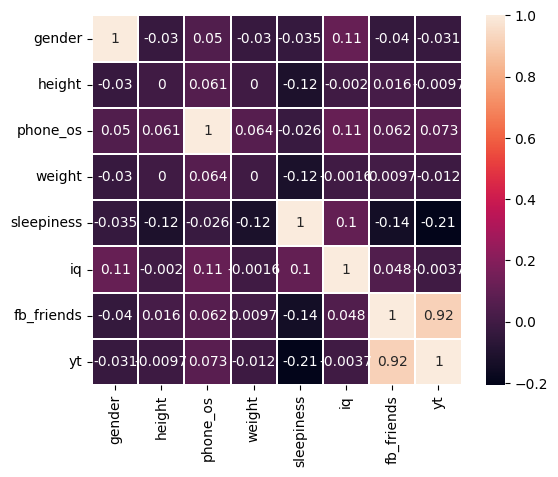

In [771]:
import seaborn as sns
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

<h2>2.4 檢查fb的資料分布

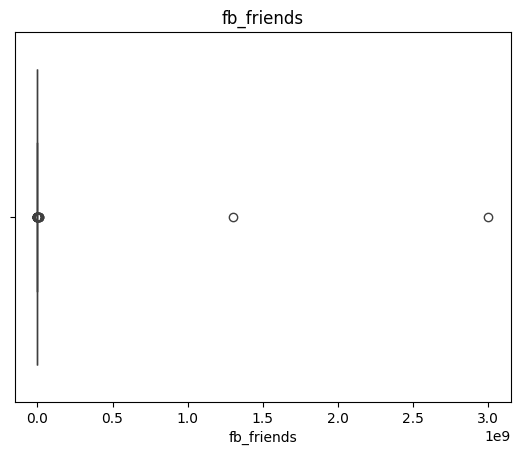

In [772]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

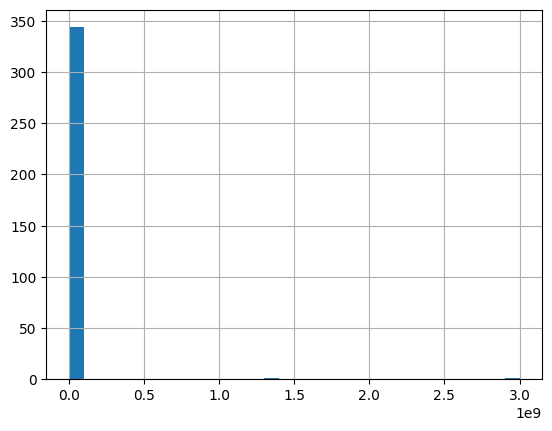

In [773]:
train_df['fb_friends'].hist(bins=30)
plt.show()

In [774]:
# 刪掉超過某個誇張數值的點，例如 > 5,000
def process_fb_friends_mobile_traffic(df, upper_limit=5000):
    df = df.copy()
    df['is_outlier_fb_friends'] = df['fb_friends'] >= upper_limit
    df['fb_friends'] = df['fb_friends'].clip(upper=upper_limit)
    return df

train_df = process_fb_friends_mobile_traffic(train_df)

In [775]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0


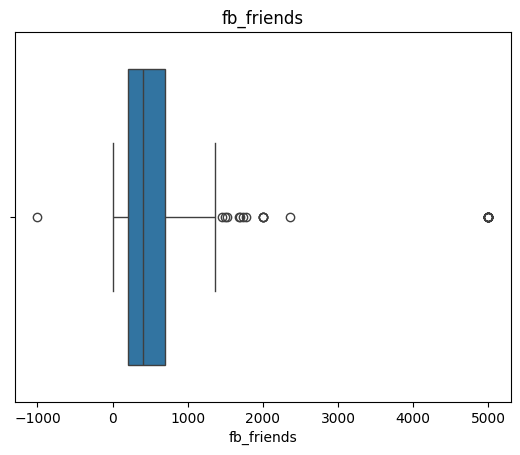

In [776]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.boxplot(x=train_df['fb_friends'])
plt.title("fb_friends")
plt.show()

In [777]:
#清理 fb_friends 欄位的異常值
train_df.loc[train_df['fb_friends'] < 0, 'fb_friends'] *= -1

In [778]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0


<h2>2.5 檢查yt資料分布

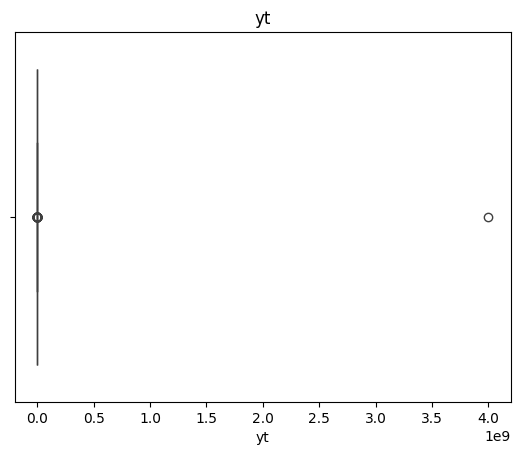

In [779]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

In [780]:
# 刪掉超過某個誇張數值的點，例如 > 150、做clip 、log1p處理資料差距
def process_yt_mobile_traffic(df, upper_limit=150):
    df = df.copy()
    df['is_outlier_yt'] = df['yt'] >= upper_limit
    df['yt'] = df['yt'].clip(upper=upper_limit)
    return df

train_df = process_yt_mobile_traffic(train_df)

In [781]:
# 清理 yt 欄位的異常值
train_df.loc[train_df['yt'] < 0, 'yt'] *= -1

In [782]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,74
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


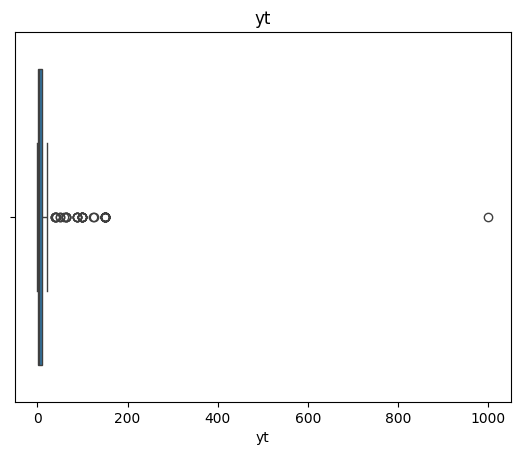

In [783]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['yt'])
plt.title("yt")
plt.show()

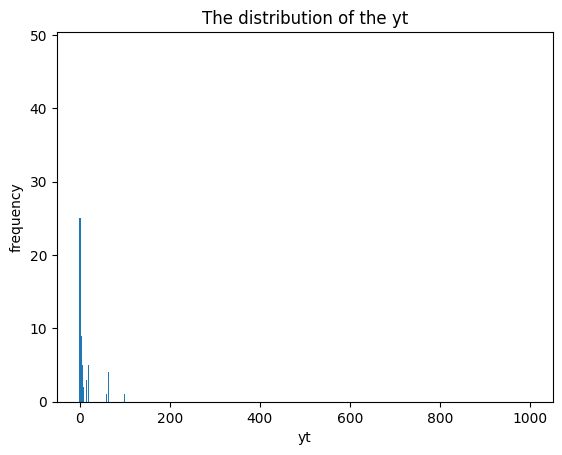

In [784]:
sleepiness_values = train_df['yt'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['yt'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('yt')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the yt')
plt.show()

<h2>2.6檢查height分布




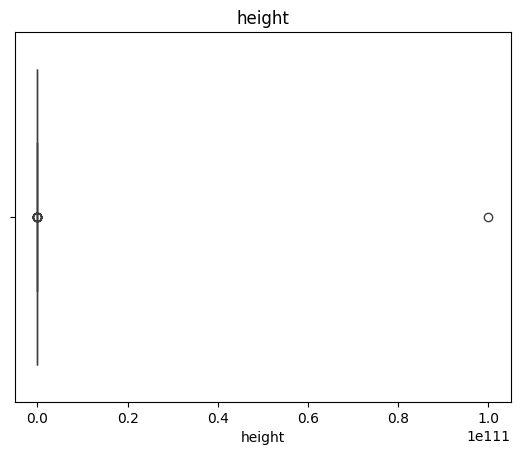

In [785]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [786]:
train_df.loc[(train_df['height'] < 100) | (train_df['height'] > 250), 'height'] = np.nan

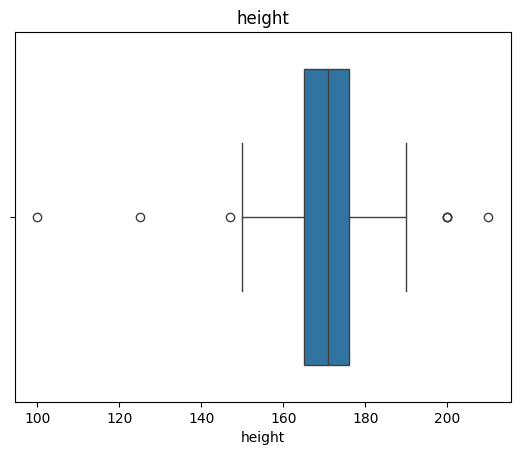

In [787]:
sns.boxplot(x=train_df['height'])
plt.title("height")
plt.show()

In [788]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,81
weight,85
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<h2>2.7檢查weight分布

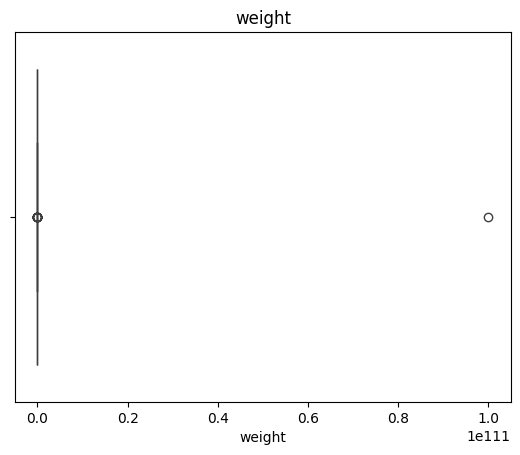

In [789]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [790]:
train_df.loc[(train_df['weight'] < 30) | (train_df['weight'] > 250), 'weight'] = np.nan

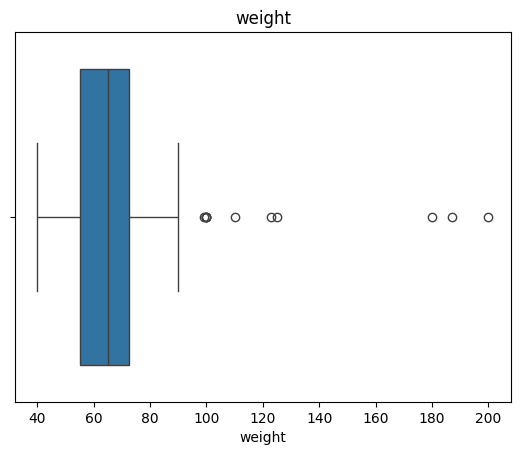

In [791]:
sns.boxplot(x=train_df['weight'])
plt.title("weight")
plt.show()

In [792]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,81
weight,92
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<h2>2.8檢查IQ分布

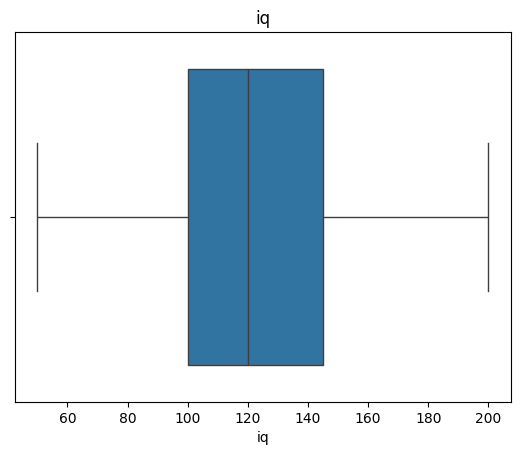

In [793]:
sns.boxplot(x=train_df['iq'])
plt.title("iq")
plt.show()

<h2>2.9檢查sleepiness分布

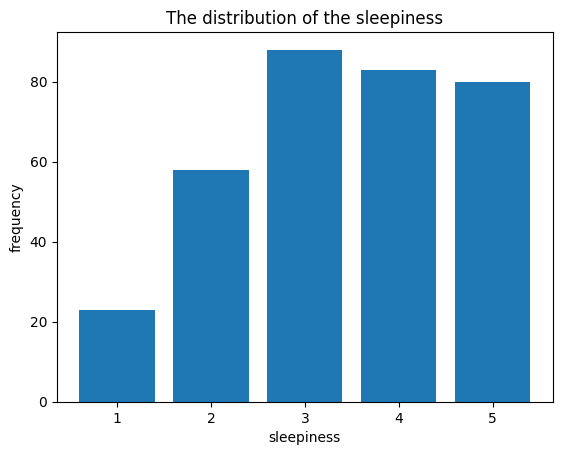

In [794]:
sleepiness_values = train_df['sleepiness'].unique()

# 計算每個年齡值的出現次數 (即統計 `sleepiness` 欄位的頻率)
value_counts = train_df['sleepiness'].value_counts()

# 重新索引 `value_counts`，確保所有 `unique_values` 都包含在內，缺少的值填入 0
value_counts = value_counts.reindex(sleepiness_values, fill_value = 0)

# 使用 Matplotlib 繪製長條圖 (Bar Chart)
plt.bar(sleepiness_values, value_counts)
plt.xlabel('sleepiness')  # 設定 X 軸標籤 (年齡數值)
plt.ylabel('frequency')  # 設定 Y 軸標籤 (年齡出現的次數)
plt.title('The distribution of the sleepiness')
plt.show()

<h2>2.10 標記train離群值欄位

In [795]:
def mark_outliers_iqr(df, columns, k=1.5):
    df_marked = df.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f" {col}: 已標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [796]:
# 要標記的欄位
target_columns = ['height', 'weight', 'iq', 'fb_friends', 'yt']

# 執行標記
train_df = mark_outliers_iqr(train_df, columns=target_columns)

 height: 已標記 88 筆離群值（不在 [148.5, 192.5] 內）
 weight: 已標記 103 筆離群值（不在 [28.75, 98.75] 內）
 iq: 已標記 79 筆離群值（不在 [32.5, 212.5] 內）
 fb_friends: 已標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
 yt: 已標記 146 筆離群值（不在 [-12.5, 23.5] 內）


<h2>2.11 標記test離群值

In [797]:
def mark_outliers_by_reference(df_target, df_reference, columns, k=1.5):
    df_marked = df_target.copy()

    for col in columns:
        if pd.api.types.is_numeric_dtype(df_reference[col]):
            Q1 = df_reference[col].quantile(0.25)
            Q3 = df_reference[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - k * IQR
            upper = Q3 + k * IQR

            df_marked[f'is_outlier_{col}'] = ~df_target[col].between(lower, upper)
            outlier_count = df_marked[f'is_outlier_{col}'].sum()
            print(f"【{col}】在 test 中標記 {outlier_count} 筆離群值（不在 [{round(lower,2)}, {round(upper,2)}] 內）")

    return df_marked


In [798]:
test_df = mark_outliers_by_reference(test_df, train_df, columns=target_columns)

【height】在 test 中標記 82 筆離群值（不在 [148.5, 192.5] 內）
【weight】在 test 中標記 111 筆離群值（不在 [28.75, 98.75] 內）
【iq】在 test 中標記 92 筆離群值（不在 [32.5, 212.5] 內）
【fb_friends】在 test 中標記 105 筆離群值（不在 [-550.0, 1450.0] 內）
【yt】在 test 中標記 200 筆離群值（不在 [-12.5, 23.5] 內）


In [799]:
# 假設你用 train_df 的欄位順序當標準
column_order = train_df.columns.tolist()

# 讓 test_df 排成一樣的欄位順序
test_df = test_df.loc[:, column_order]

# **3. 缺失值處理**


In [741]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,81
weight,92
sleepiness,91
iq,79
fb_friends,77
yt,91
is_outlier_fb_friends,0
is_outlier_yt,0


<Axes: >

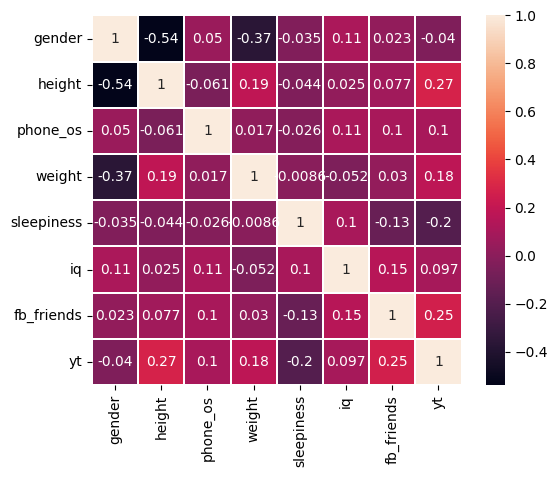

In [742]:
# 數值欄位相關性
#負擔（負擔相關）：表示兩個變數的逆轉變化（例如性別增加，身高減少）。
#正數（正相關）：表示兩個變化數同向變化（例如身高增加，體重增加）。
sns.heatmap(train_df[['gender', 'height', 'phone_os', 'weight', 'sleepiness', 'iq', 'fb_friends', 'yt']].corr(),linewidths=0.1,vmax=1.0, square=True,linecolor='white', annot=True)

In [743]:
print(test_df['gender'].unique())

[0]


In [744]:
test_df['gender'] = np.nan

In [745]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer

def dt_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: KNN 補 predictor 的缺失值
    imputer = KNNImputer(n_neighbors=5)
    train_df[predictor_cols] = imputer.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer.transform(test_df[predictor_cols])

    # Step 1: 訓練資料處理
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'max_depth': 5, 'random_state': 42}
    model = DecisionTreeRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 插補 train_df
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_missing[predictor_cols]
        train_df.loc[X_train_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 插補 test_df
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


In [746]:
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

def xgboost_impute(train_df, test_df, target_col, predictor_cols, model_params=None):
    # Step 0: KNN 補 predictor 的缺失值
    imputer = KNNImputer(n_neighbors=5)
    train_df[predictor_cols] = imputer.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer.transform(test_df[predictor_cols])

    # Step 1: 訓練資料處理
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'random_state': 42, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
    model = XGBRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 插補 train_df
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_missing[predictor_cols]
        train_df.loc[X_train_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 插補 test_df
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


In [747]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
import numpy as np

def rf_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: predictor 缺失值用 KNN 補值
    imputer = KNNImputer(n_neighbors=5)
    train_df[predictor_cols] = imputer.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer.transform(test_df[predictor_cols])

    # Step 1: 訓練資料處理
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'n_estimators': 100, 'max_depth': 5, 'random_state': 42}
    model = RandomForestRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 插補 train_df
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_missing[predictor_cols]
        train_df.loc[X_train_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 插補 test_df
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df


In [748]:
from sklearn.svm import SVR
from sklearn.impute import KNNImputer

def svm_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: KNN 補 predictor 的缺失值
    imputer = KNNImputer(n_neighbors=5)
    train_df[predictor_cols] = imputer.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer.transform(test_df[predictor_cols])

    # Step 1: 訓練資料處理
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'C': 1.0, 'epsilon': 0.1}  # 可依需求調整
    model = SVR(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 插補 train_df
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_missing[predictor_cols]
        train_df.loc[X_train_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 插補 test_df
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df

In [749]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import KNNImputer

def knn_impute(train_df, test_df, target_col, predictor_cols, model_params=None):

    # Step 0: KNNImputer 先補 predictor 的缺失值
    imputer = KNNImputer(n_neighbors=5)
    train_df[predictor_cols] = imputer.fit_transform(train_df[predictor_cols])
    test_df[predictor_cols] = imputer.transform(test_df[predictor_cols])

    # Step 1: 訓練資料處理
    train_df_non_missing = train_df[train_df[target_col].notnull()]
    X_train = train_df_non_missing[predictor_cols]
    y_train = train_df_non_missing[target_col]

    # Step 2: 模型設定
    if model_params is None:
        model_params = {'n_neighbors': 5}  # KNN 預設參數
    model = KNeighborsRegressor(**model_params)
    model.fit(X_train, y_train)

    # Step 3: 插補 train_df
    train_df_missing = train_df[train_df[target_col].isnull()]
    if not train_df_missing.empty:
        X_train_missing = train_df_missing[predictor_cols]
        train_df.loc[X_train_missing.index, target_col] = model.predict(X_train_missing)

    # Step 4: 插補 test_df
    test_df_missing = test_df[test_df[target_col].isnull()]
    if not test_df_missing.empty:
        X_test_missing = test_df_missing[predictor_cols]
        test_df.loc[X_test_missing.index, target_col] = model.predict(X_test_missing)

    return train_df, test_df

# 3.1 DT填補類別欄位

In [ ]:
#phone_os

train_df, test_df = dt_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='phone_os',
    predictor_cols=['yt', 'iq', 'fb_friends']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

#sleepiness

train_df, test_df = dt_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='sleepiness',
    predictor_cols=['yt', 'iq', 'fb_friends']
)

print(train_df.isnull().sum())


gender                    0
phone_os                 96
height                    0
weight                    0
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 78
height                    0
weight                    0
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


# 3.2 XG分欄特徵選擇(擇一)

In [392]:
#height
# 直接呼叫 function
train_df, test_df = xgboost_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='height',
    predictor_cols=['gender', 'yt', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [393]:
#fb_friends

train_df, test_df = xgboost_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='fb_friends',
    predictor_cols=['iq', 'yt', 'phone_os']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [394]:
#iq
train_df, test_df = xgboost_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='iq',
    predictor_cols=['gender', 'phone_os', 'sleepiness', 'fb_friends']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())


gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [395]:
#yt

train_df, test_df = xgboost_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='yt',
    predictor_cols=['fb_friends', 'sleepiness', 'height', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [396]:
#weight

train_df, test_df = xgboost_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='weight',
    predictor_cols=['gender', 'height', 'yt']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


# 3.2 RF數值欄位填補(擇一)

In [ ]:
#height
# 直接呼叫 function
train_df, test_df = rf_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='height',
    predictor_cols=['gender', 'yt', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                   92
sleepiness               91
iq                       79
fb_friends               85
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                   96
sleepiness               72
iq                       92
fb_friends               88
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


In [ ]:
#fb_friends

train_df, test_df = rf_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='fb_friends',
    predictor_cols=['iq', 'yt', 'phone_os']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                   92
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                   96
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


In [ ]:
#iq
train_df, test_df = rf_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='iq',
    predictor_cols=['gender', 'phone_os', 'sleepiness', 'fb_friends']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())


gender                    0
phone_os                 78
height                    0
weight                   92
sleepiness                0
iq                        0
fb_friends               85
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                   96
sleepiness                0
iq                        0
fb_friends               88
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


In [ ]:
#yt

train_df, test_df = rf_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='yt',
    predictor_cols=['fb_friends', 'sleepiness', 'height', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                   92
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                   96
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


In [ ]:
#weight

train_df, test_df = rf_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='weight',
    predictor_cols=['gender', 'height', 'yt']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                    0
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                    0
sleepiness                0
iq                        0
fb_friends                0
yt                        0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
is_outlier_fb_friends     0
dtype: int64


# 3.2 SVM(擇一)

In [691]:
#height
# 直接呼叫 function
train_df, test_df = svm_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='height',
    predictor_cols=['gender', 'yt', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                    0
sleepiness               91
iq                       79
fb_friends               77
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                    0
sleepiness               72
iq                       92
fb_friends               88
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64


In [692]:
#fb_friends

train_df, test_df = svm_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='fb_friends',
    predictor_cols=['iq', 'yt', 'phone_os']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                  0
height                    0
weight                    0
sleepiness               91
iq                        0
fb_friends                0
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64
gender                    0
phone_os                  0
height                    0
weight                    0
sleepiness               72
iq                        0
fb_friends                0
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64


In [693]:
#iq
train_df, test_df = svm_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='iq',
    predictor_cols=['gender', 'phone_os', 'sleepiness', 'fb_friends']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())


gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [694]:
#yt

train_df, test_df = svm_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='yt',
    predictor_cols=['fb_friends', 'sleepiness', 'height', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [695]:
#weight

train_df, test_df = svm_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='weight',
    predictor_cols=['gender', 'height', 'yt']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


# 3.2 KNN(擇一)

In [750]:
#height
# 直接呼叫 function
train_df, test_df = knn_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='height',
    predictor_cols=['gender', 'yt', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                 78
height                    0
weight                    0
sleepiness               91
iq                       79
fb_friends               77
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64
gender                    0
phone_os                 96
height                    0
weight                    0
sleepiness               72
iq                       92
fb_friends               88
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64


In [751]:
#fb_friends

train_df, test_df = knn_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='fb_friends',
    predictor_cols=['iq', 'yt', 'phone_os']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                    0
phone_os                  0
height                    0
weight                    0
sleepiness               91
iq                        0
fb_friends                0
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64
gender                    0
phone_os                  0
height                    0
weight                    0
sleepiness               72
iq                        0
fb_friends                0
yt                        0
is_outlier_fb_friends     0
is_outlier_yt             0
is_outlier_height         0
is_outlier_weight         0
is_outlier_iq             0
dtype: int64


In [752]:
#iq
train_df, test_df = knn_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='iq',
    predictor_cols=['gender', 'phone_os', 'sleepiness', 'fb_friends']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())


gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [753]:
#yt

train_df, test_df = knn_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='yt',
    predictor_cols=['fb_friends', 'sleepiness', 'height', 'weight']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


In [754]:
#weight

train_df, test_df = knn_impute(
    train_df=train_df,
    test_df=test_df,
    target_col='weight',
    predictor_cols=['gender', 'height', 'yt']
)

print(train_df.isnull().sum())
print(test_df.isnull().sum())

gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64
gender                   0
phone_os                 0
height                   0
weight                   0
sleepiness               0
iq                       0
fb_friends               0
yt                       0
is_outlier_fb_friends    0
is_outlier_yt            0
is_outlier_height        0
is_outlier_weight        0
is_outlier_iq            0
dtype: int64


# 3.2 XGBoost填補(擇一)

In [470]:
#XGBoost
import xgboost as xgb

def train_xgb_imputer(train_df):
    imputer_models = {}
    for col in train_df.columns:
        known = train_df[train_df[col].notnull()]
        if len(known) > 0:
            model = xgb.XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
            model.fit(known.drop(columns=[col]), known[col])
            imputer_models[col] = model
    return imputer_models

def impute_with_xgb(train_df, test_df, imputer_models):
    df_test_imputed = test_df.copy()
    for col, model in imputer_models.items():
        unknown = df_test_imputed[df_test_imputed[col].isnull()]
        if len(unknown) > 0:
            predictions = model.predict(unknown.drop(columns=[col]))

            # 根據原始資料型態來決定轉換方式
            if pd.api.types.is_integer_dtype(train_df[col]):
                predictions = pd.Series(predictions).round().astype(pd.Int64Dtype()).to_numpy()

            df_test_imputed.loc[df_test_imputed[col].isnull(), col] = predictions

    return df_test_imputed



# 訓練 XGBoost 插補模型
xgb_models = train_xgb_imputer(train_df)

# 使用 XGBoost 模型插補 test_df
# 訓練補值模型
models = train_xgb_imputer(train_df)

# 補 train 自己
train_df = impute_with_xgb(train_df, train_df, models)

# 補 test
test_df = impute_with_xgb(train_df, test_df, models)

# 3.2MICE(擇一)

In [523]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state=42)

train_df[target_columns] = imputer.fit_transform(train_df[target_columns])
test_df[target_columns] = imputer.transform(test_df[target_columns])


In [524]:
test_df.isnull().sum()

,0
gender,426
phone_os,96
height,0
weight,0
sleepiness,72
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


In [525]:
train_df.isnull().sum()

,0
gender,0
phone_os,78
height,0
weight,0
sleepiness,91
iq,0
fb_friends,0
yt,0
is_outlier_fb_friends,0
is_outlier_yt,0


# 3.2 MISSForest(無法)

In [578]:
pip install MissForest

In [583]:
import pandas as pd
import numpy as np
from missforest import MissForest

def missforest_impute(train_df, test_df, max_iter=10, ignore_test_all_nan=True):
    train_df = train_df.copy()
    test_df = test_df.copy()

    # Step 1: 自動偵測 categorical
    categorical = [col for col in train_df.columns if col.startswith('is_outlier_')]
    continuous = [col for col in train_df.columns if col not in categorical and col not in cat_cols]

    # Step 2: 類別型轉 Int64
    for col in categorical:
        train_df[col] = train_df[col].astype('Int64')
        test_df[col] = test_df[col].astype('Int64')

    # Step 3: 連續型轉 float64
    for col in continuous:
        train_df[col] = train_df[col].astype('float64')
        test_df[col] = test_df[col].astype('float64')

    # Step 4: 指定 train 和 test 各自的 used_cols
    train_used_cols = train_df.columns.tolist()

    if ignore_test_all_nan:
        ignore_cols = [col for col in train_df.columns if test_df[col].isnull().all()]
        if ignore_cols:
            print(f"test_df 發現以下欄位全為 NaN，將在 imputation 階段忽略: {ignore_cols}")
        test_used_cols = [col for col in train_df.columns if col not in ignore_cols]
    else:
        test_used_cols = train_df.columns.tolist()

    # Step 5: MissForest (用 train 的 feature set 訓練)
    mf = MissForest(max_iter=max_iter, categorical=[col for col in categorical if col in train_used_cols])

    # 訓練集補值
    if train_df[train_used_cols].isnull().sum().sum() > 0:
        train_imputed = mf.fit_transform(train_df[train_used_cols])
        train_df_rf = train_df.copy()
        train_df_rf[train_used_cols] = train_imputed
        print("訓練集填補完成")
    else:
        train_df_rf = train_df.copy()
        print("訓練集無缺失值")

    # 測試集補值
    if test_df[test_used_cols].isnull().sum().sum() > 0:
        test_imputed = mf.transform(test_df[test_used_cols])
        test_df_rf = test_df.copy()
        test_df_rf[test_used_cols] = test_imputed
        print("測試集填補完成")
    else:
        test_df_rf = test_df.copy()
        print("測試集無缺失值")

    # Step 6: 類別型回復 Int64
    for col in categorical:
        if col in train_df_rf.columns:
            train_df_rf[col] = train_df_rf[col].round().astype('Int64')
        if col in test_df_rf.columns:
            test_df_rf[col] = test_df_rf[col].round().astype('Int64')

    print("\n最終訓練集缺失值數量:", train_df_rf.isnull().sum().sum())
    print("最終測試集缺失值數量:", test_df_rf.isnull().sum().sum())

    return train_df_rf, test_df_rf
train_df, test_df = missforest_impute(train_df, test_df, ignore_test_all_nan=True)

/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:333: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "


test_df 發現以下欄位全為 NaN，將在 imputation 階段忽略: ['gender']


100%|██████████| 10/10 [00:12<00:00,  1.23s/it]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("Label encoding is no longer performed by default. "
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:494: UserWarning: In version 4.2.3, estimator fitting process is moved to `fit` method. `MissForest` will now imputes unseen missing values with fitted estimators with `transform` method. To retain the old behaviour, use `fit_transform` to fit the whole unseen data instead.
  warnings.warn(f"In version {VERSION}, estimator fitting process "
100%|██████████| 10/10 [00:00<00:00, 35.88it/s]
/usr/local/lib/python3.11/dist-packages/missforest/missforest.py:490: UserWarning: Label encoding is no longer performed by default. Users will have to perform categorical features encoding by themselves.
  warnings.warn("

訓練集填補完成


ValueError: Columns are not consistent.

# **4. 編碼文字欄位(self_intro)**


In [397]:
test_df['gender'] = np.nan

 Categorical Variables Encoding

<h2>4.1 TF-IDF

In [398]:
train_df['self_intro'] = self_train_backup.loc[train_df.index]
test_df['self_intro'] = self_test_backup.loc[test_df.index]

In [399]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,self_intro
0,2.0,1.0,154.0,43.0,3.828571,131.4,583.0,0.0,False,False,False,False,True,Beautiful
1,2.0,1.0,156.0,47.0,3.451220,130.0,311.6,3.5,True,False,False,False,False,Enjoying being who I'm notsss
2,1.0,0.4,170.0,61.0,2.615385,90.0,540.0,91.1,False,True,False,False,False,Practice Makes perfect
3,1.0,1.0,170.0,62.0,4.000000,100.0,165.0,5.0,True,False,False,False,False,Straightforward
4,2.0,0.0,158.0,67.0,3.451220,128.0,320.0,1.2,False,False,False,False,False,Humorous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.0,0.0,166.0,66.0,4.000000,90.0,1000.0,1.0,False,False,False,False,False,I hope i am a super hero.
419,1.0,0.0,176.0,65.0,4.000000,87.0,1300.0,2.0,False,False,False,False,False,NaN
420,1.0,1.0,174.0,72.0,2.000000,145.2,2000.0,9.0,True,False,False,False,True,NaN
421,2.0,1.0,167.0,50.0,3.000000,180.0,483.0,10.0,False,False,False,False,False,NaN


In [400]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,is_outlier_height,is_outlier_weight,is_outlier_iq,self_intro
0,NaN,1.000000,200.0,100.0,1.00000,87.0,87.0,87.0000,False,True,True,True,False,GOod
1,NaN,1.000000,175.0,80.0,3.00000,138.0,2000.0,81.8272,True,True,False,False,True,Easygoing
2,NaN,1.000000,155.0,45.0,3.00000,150.0,824.0,9.0000,True,False,False,False,False,NaN
3,NaN,1.000000,173.0,85.0,4.00000,115.4,1372.8,15.0000,True,False,False,False,True,NaN
4,NaN,0.000000,164.0,57.0,4.00000,130.0,505.0,2.0000,False,False,False,False,False,I'm smart
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1.000000,160.0,70.0,4.00000,132.0,500.0,5.0000,False,False,False,False,True,I am a girl.
422,NaN,0.000000,162.0,54.0,3.00000,180.0,462.0,5.0000,False,False,False,False,False,NaN
423,NaN,1.000000,173.0,66.0,3.45122,135.0,102.0,11.1000,False,False,False,False,False,I like to play basketball.
424,NaN,0.400000,165.0,53.0,3.45122,110.0,507.0,416.0000,False,True,False,False,False,Good


In [401]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. 補空字串
train_df['self_intro'] = train_df['self_intro'].fillna("")

# 2. 向量轉換
vectorizer = TfidfVectorizer(max_features=100)
X_tfidf = vectorizer.fit_transform(train_df['self_intro'])

# 3. 建立 DataFrame 並保留原 index
tfidf_df = pd.DataFrame(
    X_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=train_df.index
)

# 4. 合併
train_df = pd.concat([train_df.drop(columns=['self_intro']), tfidf_df], axis=1)


In [402]:
train_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,2.0,1.0,154.0,43.0,3.828571,131.4,583.0,0.0,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,156.0,47.0,3.451220,130.0,311.6,3.5,True,False,...,0.0,0.527714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.4,170.0,61.0,2.615385,90.0,540.0,91.1,False,True,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,170.0,62.0,4.000000,100.0,165.0,5.0,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0.0,158.0,67.0,3.451220,128.0,320.0,1.2,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.0,0.0,166.0,66.0,4.000000,90.0,1000.0,1.0,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
419,1.0,0.0,176.0,65.0,4.000000,87.0,1300.0,2.0,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,1.0,1.0,174.0,72.0,2.000000,145.2,2000.0,9.0,True,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
421,2.0,1.0,167.0,50.0,3.000000,180.0,483.0,10.0,False,False,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [403]:
# 1. 填補空值（防止 NaN 導致 TF-IDF 出錯）
test_df['self_intro'] = test_df['self_intro'].fillna("")

# 2. 套用已訓練好的 vectorizer（⚠️ 不能再用 fit_transform）
X_test_tfidf = vectorizer.transform(test_df['self_intro'])

# 3. 轉成 DataFrame（⚠️ index 要對齊）
tfidf_test_df = pd.DataFrame(
    X_test_tfidf.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=test_df.index
)

# 4. 合併進 test_df（移除原本的 self_intro）
test_df = pd.concat([test_df.drop(columns=['self_intro']), tfidf_test_df], axis=1)



In [404]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,want,who,wise,with,without,work,world,xd,you,zzzz
0,NaN,1.000000,200.0,100.0,1.00000,87.0,87.0,87.0000,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,1.000000,175.0,80.0,3.00000,138.0,2000.0,81.8272,True,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.000000,155.0,45.0,3.00000,150.0,824.0,9.0000,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,1.000000,173.0,85.0,4.00000,115.4,1372.8,15.0000,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0.000000,164.0,57.0,4.00000,130.0,505.0,2.0000,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,NaN,1.000000,160.0,70.0,4.00000,132.0,500.0,5.0000,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
422,NaN,0.000000,162.0,54.0,3.00000,180.0,462.0,5.0000,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
423,NaN,1.000000,173.0,66.0,3.45122,135.0,102.0,11.1000,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424,NaN,0.400000,165.0,53.0,3.45122,110.0,507.0,416.0000,False,True,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#  **5. 特徵選取**

In [405]:
pip install featuretools

In [406]:
import featuretools as ft
from xgboost import XGBClassifier

train_df['id'] = id_train_backup
test_df['id'] = id_test_backup
def generate_feature_matrix(df, drop_cols, feature_defs=None, is_train=True):
  df_ft = df.drop(columns=drop_cols)

  # 建立 EntitySet
  es = ft.EntitySet(id='data_set')
  es.add_dataframe(dataframe_name='users', dataframe=df_ft, index='id')

  if is_train:
      # 訓練資料，使用 dfs 產生特徵與定義
      feature_matrix, feature_defs_out = ft.dfs(
          entityset=es,
          target_dataframe_name='users',
          trans_primitives=[
              'add_numeric',
              'subtract_numeric',
              'multiply_numeric',
              'divide_numeric',
              'percentile',
              'absolute',
              'negate'
          ],
          max_depth=1
      )
  else:
      # 測試資料，使用訓練階段的特徵定義
      feature_matrix = ft.calculate_feature_matrix(
          entityset=es,
          features=feature_defs
      )
      feature_defs_out = None  # 測試階段不需要產出新的定義

  # 合併回原始資料
  df_combined = pd.merge(df, feature_matrix, on='id', how='left')

  return df_combined, feature_defs_out

In [407]:
exclude_cols = ['gender', 'phone_os']

# 做特徵工程
train_df_combined, feature_defs = generate_feature_matrix(train_df, drop_cols=exclude_cols, is_train=True)
test_df_combined, _ = generate_feature_matrix(test_df, drop_cols=exclude_cols, feature_defs=feature_defs, is_train=False)
train_df_combined

,gender,phone_os,height_x,weight_x,sleepiness_x,iq_x,fb_friends_x,yt_x,is_outlier_fb_friends_x,is_outlier_yt_x,...,world - xd,world - you,world - yt,world - zzzz,xd - you,xd - yt,xd - zzzz,you - yt,you - zzzz,yt - zzzz
0,2.0,1.0,154.0,43.0,3.828571,131.4,583.0,0.0,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,1.0,156.0,47.0,3.451220,130.0,311.6,3.5,True,False,...,0.0,0.0,-3.5,0.0,0.0,-3.5,0.0,-3.5,0.0,3.5
2,1.0,0.4,170.0,61.0,2.615385,90.0,540.0,91.1,False,True,...,0.0,0.0,-91.1,0.0,0.0,-91.1,0.0,-91.1,0.0,91.1
3,1.0,1.0,170.0,62.0,4.000000,100.0,165.0,5.0,True,False,...,0.0,0.0,-5.0,0.0,0.0,-5.0,0.0,-5.0,0.0,5.0
4,2.0,0.0,158.0,67.0,3.451220,128.0,320.0,1.2,False,False,...,0.0,0.0,-1.2,0.0,0.0,-1.2,0.0,-1.2,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,1.0,0.0,166.0,66.0,4.000000,90.0,1000.0,1.0,False,False,...,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,0.0,1.0
419,1.0,0.0,176.0,65.0,4.000000,87.0,1300.0,2.0,False,False,...,0.0,0.0,-2.0,0.0,0.0,-2.0,0.0,-2.0,0.0,2.0
420,1.0,1.0,174.0,72.0,2.000000,145.2,2000.0,9.0,True,False,...,0.0,0.0,-9.0,0.0,0.0,-9.0,0.0,-9.0,0.0,9.0
421,2.0,1.0,167.0,50.0,3.000000,180.0,483.0,10.0,False,False,...,0.0,0.0,-10.0,0.0,0.0,-10.0,0.0,-10.0,0.0,10.0


In [408]:
# 目標欄位
target_col = 'gender'

# 特徵與標籤
X = train_df_combined.drop(columns=['id', 'gender'])
y = train_df_combined['gender'].map({1: 0, 2: 1})  # 不動原始欄位

# ✅ 清理 inf / NaN
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median(numeric_only=True))
X = X.clip(lower=-1e6, upper=1e6)  # 可選：限制極端值

# 建立模型
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model.fit(X, y)


# 特徵重要性對應每個欄位
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# 排序（由高到低）
feature_importances = feature_importances.sort_values(ascending=False)

# 顯示前 20 名最重要的特徵
print("Top 10 重要特徵：")
print(feature_importances.head(10))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:38:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Top 10 重要特徵：
height + weight         0.147117
free - height           0.137109
height_x                0.096946
beautiful - height      0.054506
brilliant + kindness    0.037879
weight - wise           0.032423
big - weight            0.027847
am - weight             0.022688
height + nerd           0.022193
brilliant + haha        0.020924
dtype: float32


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24501 (\N{CJK UNIFIED IDEOGRAPH-5FB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas

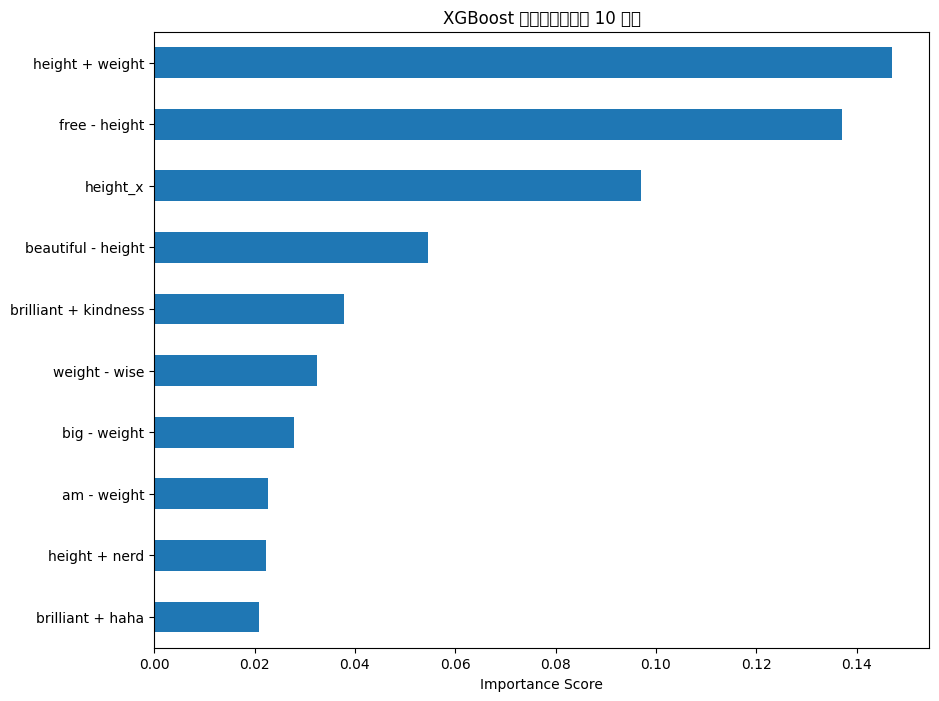

In [409]:
import matplotlib.pyplot as plt

feature_importances.head(10).plot(kind='barh', figsize=(10, 8))
plt.title("XGBoost 特徵重要性（前 10 名）")
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.show()


In [410]:
top_10_features = feature_importances.head(10).index.tolist()

# 將 top_10 特徵從 feature_matrix 擷取出來（包含 id 方便 merge）
train_top_features = train_df_combined[['id'] + top_10_features]
test_top_features = test_df_combined[['id'] + top_10_features]

# 加回到原始 train/test 資料表中
train_df = pd.merge(train_df, train_top_features, on='id', how='left')
test_df = pd.merge(test_df, test_top_features, on='id', how='left')
train_df.drop(columns=["id"], inplace=True)
test_df.drop(columns=["id"], inplace=True)

# **6.資料不平衡處理**


In [411]:
print(train_df['gender'].value_counts(normalize=True))

gender
1.0    0.747045
2.0    0.252955
Name: proportion, dtype: float64


In [412]:
pip install imbalanced-learn

<h2>6.1 SMOTE

In [413]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# 定義 SMOTE 處理函數
def apply_smote(X, y, random_state=42):
    # 處理無窮大和 NaN
    X = X.replace([np.inf, -np.inf], np.nan)
    X = X.fillna(X.median(numeric_only=True))
    # 標籤轉為 0 和 1
    y_encoded = y - 1 # gender: 1/2 → 0/1
    # SMOTE 重抽樣
    smote = SMOTE(random_state=random_state)
    X_smote, y_smote = smote.fit_resample(X, y_encoded)
    print("SMOTE 後分佈：", Counter(y_smote))
    return X_smote, y_smote


# 特徵與標籤切分
X = train_df.drop(columns=['gender']).astype(float)
y = train_df['gender']
X_smote, y_smote = apply_smote(X, y, random_state=42)

SMOTE 後分佈： Counter({1.0: 316, 0.0: 316})


# **7. 預測分類模型**


<h2> 7.1 XGBOOST

(討論)ValueError: Invalid classes inferred from unique values of y.  Expected: [0 1], got [1 2]

In [414]:
# from xgboost import XGBClassifier
# #  建立模型
# xg_clf = XGBClassifier(
#     max_depth=5,
#     learning_rate=0.1,
#     n_estimators=100,
#     eval_metric='logloss',
#     random_state=42
# )

# # 模型訓練
# xg_clf.fit(X_smote, y_smote)

# # 預測：X_test 的準備記得也要和 train_df 的欄位一致
# X_test = test_df.drop(columns=['gender']).astype(float)

# # 預測結果：轉回原本的 1/2 標籤
# y_test_pred = xg_clf.predict(X_test) + 1


In [415]:
print("Train 欄位缺失情況：")
print(train_df.isna().sum())

print("\nTest 欄位缺失情況：")
print(test_df.isna().sum())

Train 欄位缺失情況：
gender              0
phone_os            0
height              0
weight              0
sleepiness          0
                   ..
weight - wise       0
big - weight        0
am - weight         0
height + nerd       0
brilliant + haha    0
Length: 123, dtype: int64

Test 欄位缺失情況：
gender              426
phone_os              0
height                0
weight                0
sleepiness            0
                   ... 
weight - wise         0
big - weight          0
am - weight           0
height + nerd         0
brilliant + haha      0
Length: 123, dtype: int64


<h2>7.2 Random forest

In [416]:
from sklearn.ensemble import RandomForestClassifier

# 建立模型
rf_clf = RandomForestClassifier(
    n_estimators=200,      # 增加樹的數量以提升穩定性，RF 通常受益於更多樹
    max_depth=10,          # 稍微增加深度，RF 不易過擬合，可適當放寬
    min_samples_split=5,   # 控制每個節點分裂的最小樣本數，減少過擬合
    min_samples_leaf=2,    # 葉節點最小樣本數，提升模型泛化能力
    max_features='sqrt',   # 特徵子集選擇，RF 常用 sqrt 提升多樣性
    criterion='gini',      # 使用基尼係數，RF 中常見且計算效率高
    random_state=42,       # 保持隨機種子一致性
    n_jobs=-1              # 使用所有可用 CPU 核心加速訓練
)

# 模型訓練
rf_clf.fit(X_smote, y_smote)

# 預測：X_test 的準備記得也要和 train_df 的欄位一致
X_test = test_df.drop(columns=['gender']).astype(float)

# 處理異常值（參考 X_smote 而非 X_train）
for col in X_test.columns:
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')  # 轉為數值，無效值變 NaN
    # 使用 X_smote 的中位數填充（因為 X_smote 是訓練數據）
    X_test[col] = X_test[col].replace([np.inf, -np.inf], np.nan).fillna(X_smote[col].median())
    X_test[col] = X_test[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍

# 預測結果：轉回原本的 1/2 標籤
y_test_pred = rf_clf.predict(X_test) + 1

In [417]:
test_df['gender'] = y_test_pred

In [418]:
test_df

,gender,phone_os,height,weight,sleepiness,iq,fb_friends,yt,is_outlier_fb_friends,is_outlier_yt,...,height + weight,free - height,height_x,beautiful - height,brilliant + kindness,weight - wise,big - weight,am - weight,height + nerd,brilliant + haha
0,1.0,1.000000,200.0,100.0,1.00000,87.0,87.0,87.0000,False,True,...,300.0,-200.0,200.0,-200.0,0.0,100.0,-100.0,-100.000000,200.0,0.0
1,1.0,1.000000,175.0,80.0,3.00000,138.0,2000.0,81.8272,True,True,...,255.0,-175.0,175.0,-175.0,0.0,80.0,-80.0,-80.000000,175.0,0.0
2,2.0,1.000000,155.0,45.0,3.00000,150.0,824.0,9.0000,True,False,...,200.0,-155.0,155.0,-155.0,0.0,45.0,-45.0,-45.000000,155.0,0.0
3,1.0,1.000000,173.0,85.0,4.00000,115.4,1372.8,15.0000,True,False,...,258.0,-173.0,173.0,-173.0,0.0,85.0,-85.0,-85.000000,173.0,0.0
4,2.0,0.000000,164.0,57.0,4.00000,130.0,505.0,2.0000,False,False,...,221.0,-164.0,164.0,-164.0,0.0,57.0,-57.0,-57.000000,164.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2.0,1.000000,160.0,70.0,4.00000,132.0,500.0,5.0000,False,False,...,230.0,-160.0,160.0,-160.0,0.0,70.0,-70.0,-69.440084,160.0,0.0
422,2.0,0.000000,162.0,54.0,3.00000,180.0,462.0,5.0000,False,False,...,216.0,-162.0,162.0,-162.0,0.0,54.0,-54.0,-54.000000,162.0,0.0
423,1.0,1.000000,173.0,66.0,3.45122,135.0,102.0,11.1000,False,False,...,239.0,-173.0,173.0,-173.0,0.0,66.0,-66.0,-66.000000,173.0,0.0
424,2.0,0.400000,165.0,53.0,3.45122,110.0,507.0,416.0000,False,True,...,218.0,-165.0,165.0,-165.0,0.0,53.0,-53.0,-53.000000,165.0,0.0


In [419]:
gender_counts = test_df['gender'].value_counts(dropna=False)
gender_counts

,count
gender,
1.0,303
2.0,123


In [420]:
test_df['gender'] = test_df['gender'].astype('int64')

In [421]:
import datetime
today_str = (datetime.datetime.utcnow() + datetime.timedelta(hours=8)).strftime('%m%d')
filename = f'{today_str}_rf.csv'

submit_df = pd.DataFrame({
    "id": range(1, len(test_df)+1),
    "gender": test_df["gender"]
})

# 直接儲存到 Google 雲端硬碟的路徑
submit_df.to_csv(f'drive/My Drive/Colab Notebooks/datasets/{filename}', index=False)

print("檔案已成功儲存到 Google 雲端硬碟！")

檔案已成功儲存到 Google 雲端硬碟！


In [422]:
# 定義數據清理函數
def clean_data(X, reference_df=None):
    """
    清理數據中的無窮大和 NaN 值。

    參數:
    - X: 要清理的數據
    - reference_df: 用於填充 NaN 的參考數據（可選）
    """
    X_clean = X.copy()
    for col in X_clean.columns:
        X_clean[col] = pd.to_numeric(X_clean[col], errors='coerce')  # 轉為數值，無效值變 NaN
        # 如果有參考數據，使用其中位數填充；否則用自身中位數
        fill_value = reference_df[col].median() if reference_df is not None else X_clean[col].median()
        X_clean[col] = X_clean[col].replace([np.inf, -np.inf], np.nan).fillna(fill_value)
        X_clean[col] = X_clean[col].clip(lower=-1e38, upper=1e38)  # 限制值範圍
    return X_clean

In [423]:
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# 定義交叉驗證函數
def run_cross_validation(X, y, model, use_smote=True, cv=5, random_state=42):
    """
    執行交叉驗證並返回多個評估指標。

    參數:
    - X: 特徵數據
    - y: 標籤數據 (假設為 1/2)
    - model: 要評估的模型
    - use_smote: 是否在交叉驗證中使用 SMOTE (True: 用 Pipeline; False: 直接用原始數據)
    - cv: 交叉驗證折數，預設為 5
    - random_state: 隨機種子

    返回:
    - metrics: 包含各指標的字典
    """
    # 清理數據
    X_clean = clean_data(X)
    # 調整標籤為 0/1
    y_adjusted = y - 1

    # 根據 use_smote 選擇是否使用 Pipeline
    if use_smote:
        pipeline = Pipeline([
            ('smote', SMOTE(random_state=random_state)),
            ('classifier', model)
        ])
        estimator = pipeline
    else:
        estimator = model


    # 計算各評估指標
    metrics = {
        'accuracy': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='accuracy'),
        'precision': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='precision'),
        'recall': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='recall'),
        'f1': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='f1'),
        'roc_auc': cross_val_score(estimator, X_clean, y_adjusted, cv=cv, scoring='roc_auc')
    }

    # 輸出結果
    print(f"\n{model}\n五折交叉驗證評估指標（use_smote={use_smote}）：")
    for metric, scores in metrics.items():
        print(f"{metric}: 平均 = {np.mean(scores):.4f}, 每折 = {scores}")

    return metrics
# 測試 1: 使用 Pipeline(有對訓練集做smote)
metrics_smote = run_cross_validation(X, y, rf_clf, use_smote=False)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)
五折交叉驗證評估指標（use_smote=False）：
accuracy: 平均 = 0.9149, 每折 = [0.82352941 0.94117647 0.98823529 0.89285714 0.92857143]
precision: 平均 = 0.8587, 每折 = [0.70588235 0.9047619  0.95454545 0.83333333 0.89473684]
recall: 平均 = 0.7866, 每折 = [0.54545455 0.86363636 1.         0.71428571 0.80952381]
f1: 平均 = 0.8190, 每折 = [0.61538462 0.88372093 0.97674419 0.76923077 0.85      ]
roc_auc: 平均 = 0.9531, 每折 = [0.87734488 0.94877345 1.         0.95540438 0.98412698]


In [424]:
metrics_smote = run_cross_validation(X, y, xg_clf, use_smote=False)

NameError: name 'xg_clf' is not defined